In [1]:
class Dog:
    def is_puppy(self):
        return self.age < 2
    
    def speak(self): # 1st param of a method is called the "receiver"
        if self.is_puppy():
            print(self.name + ":" + " bark!"*10)
        else:
            print(self.name + ": bark!")
        
    def birthdays(self, years=1):
        self.age += years
        
    # special method (because it gets called automatically)
    # this particular special method is called a constructor
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    # a Jupyter special method
    def _repr_html_(self):
        return f"<h1>I am the <b>dog</b> <i>{self.name}</i></h1>"
        
    def __repr__(self): # programmers
        return f"Dog({repr(self.name)}, {self.age})"
        
    def __str__(self):  # other users
        return f"I am the dog {self.name}"
    
    def __eq__(self, right):
        return self.name == right.name and self.age == right.age
    
    def __lt__(self, right): # less than
        return self.age < right.age
    
class Cat:
    def speak(self):
        print("meow")

dog1 = Dog("Fido", 1) # instantiation+initialization
dog2 = Dog("Sam", 5)
dog3 = Dog("Cuddles", 3)
c = Cat()

In [2]:
dogs = [dog1, dog2, dog3]
dogs

[Dog('Fido', 1), Dog('Sam', 5), Dog('Cuddles', 3)]

In [3]:
sorted(dogs)

[Dog('Fido', 1), Dog('Cuddles', 3), Dog('Sam', 5)]

In [4]:
print(repr(dog1))
fido_v2 = Dog('Fido', 1)

fido_v2 == dog1

Dog('Fido', 1)


True

# Indexing

In [5]:
range(2, 5)

range(2, 5)

In [6]:
class Range:
    def __init__(self, v1, v2=None):
        if v2 != None:
            self.lower = v1
            self.upper = v2
        else:
            self.lower = 0
            self.upper = v1
            
    def __repr__(self):
        return f"Range({self.lower}, {self.upper})"
        
    def __getitem__(self, lookup):
        if not isinstance(lookup, int):
            raise NotImplementedError("only int idx supported")
        if lookup < 0:
            raise NotImplementedError("neg idx not supported")
        if self.lower + lookup >= self.upper:
            raise IndexError("idx too big")
        return self.lower + lookup
    
    def __len__(self):
        return self.upper - self.lower

r = Range(3, 8)
r

Range(3, 8)

In [7]:
r[2] # r will go to the 1st param, 2 will go to the 2nd param

5

In [8]:
for x in r:
    print(x)

3
4
5
6
7


In [9]:
list(r)

[3, 4, 5, 6, 7]

In [10]:
len(r)

5

# With

In [11]:
f = open("example.txt", "w")
f.write("hello")
# what if I crash here?
f.write("world")
f.close()

In [12]:
#f = open("example.txt", "w")
with open("example.txt", "w") as f:
    f.write("hello")
    # what if I crash here?
    f.write("world")

# AUTOMATIC: f.close()

In [13]:
class Example:
    def __enter__(self):
        print("ENTER")
        
    def __exit__(self, exc_type, exc_value, traceback):
        print("EXIT")
        
with Example():
    assert 1 == 2
    print("INSIDE WITH")

ENTER
EXIT


AssertionError: 

In [14]:
import matplotlib.pyplot as plt
plt.rcParams["font.size"]

10.0

In [17]:
# d = DoubleFont()
# d.__enter__()
# #plt.subplots()
# d.__exit__(None, None, None)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

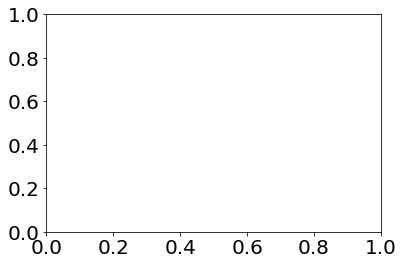

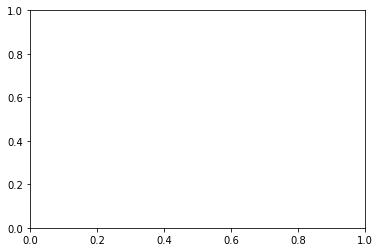

In [15]:
class DoubleFont:
    def __enter__(self):
        plt.rcParams["font.size"] *= 2
        
    def __exit__(self, exc_type, exc_value, traceback):
        plt.rcParams["font.size"] /= 2
        
with DoubleFont():
    plt.subplots()
plt.subplots()